# Introduction

You can use this notebook to get the activations and the Representational Similarity Matrices (RSMs) for mouse visual areas and the pretrained models in response to natural videos. The details of the Representational Similarity Analysis are explained in the paper. 

You can also use this notebook to run a full comparison between all the brain areas and the pretrained models.


# Get activations and RSMs for Allen data

Use the code below to get the activations and Representational Similarity Matrices (RSMs) of mouse visual areas in response to natural videos. get_RSM() downloads the data specified with the arguments from Allen Brain Observatory server, and estimates RSMs and their noise ceilings for the specied population of neurons. 


In [1]:
from allensdk.core.brain_observatory_cache import BrainObservatoryCache
boc = BrainObservatoryCache(manifest_file="C:\\Users\\Iced Fractal\\dev\\mouse_contrastive\\brain_observatory\\manifest.json")

In [24]:
import numpy as np
events = np.load("C:\\Users\\Iced Fractal\\dev\\mouse_contrastive\\brain_observatory\\ophys_experiment_events\\511534603_events.npz")

In [31]:
events["ev"].shape

(213, 115477)

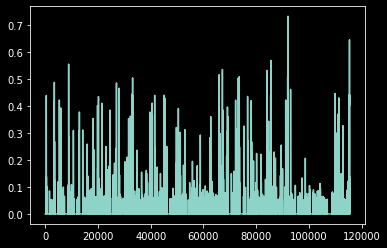

In [27]:
plt.plot(events["ev"][0])

In [2]:
from allenDataAnalysis import *


allen sdk version is 2.12.3


In [6]:
# df_unnorm.to_csv("noise_ceiling_multi_runs_cux2_unnormed.csv")

In [12]:
from allenDataAnalysis import *
import pandas as pd
import traceback

imaging_depths = boc.get_all_imaging_depths()
# imaging_depths = [imaging_depths[:7], imaging_depths[7:16], imaging_depths[16:20], imaging_depths[20:]]

# excitatory = [x for x in boc.get_all_cre_lines() if not any([inh in x for inh in ["Vip", "Sst", "Pvalb"]])]
cre_lines = ["Cux2-CreERT2"]

df = pd.DataFrame()
df_unnorm = pd.DataFrame()

for cre_line in [cre_lines]:
    for area in ["VISp"]:
            for downsample_rate in [1/5]:
                if len(boc.get_experiment_containers(targeted_structures=[area], imaging_depths=imaging_depths, cre_lines=cre_line))<1:
                    continue
                
                # try: 
                all_RSM_Allen, noise_ceiling_rsm, noise_ceiling_cka, activations, data_set, events = get_RSM(
                    CreLine = cre_line, TargetedStruct = [area], 
                    ImagingDepth = imaging_depths, StimType = 'natural_movies_one',downsample_rate = downsample_rate, 
                    pool_sessions = True
                    )
                # except Exception as e: 
                #     print("ERROR", e)
                #     print(traceback.format_exc())
                #     continue
                
#                 cux2_indicator = 'Cux2-CreERT2' if len(cre_line) == 1 else 'all'
#                 print("Normal Values")
#                 print('Area: ', area, 'Depth: ', depth, 'Downsample rate: ', downsample_rate, 'cre_line: ', cre_line,
#                     np.median(noise_ceiling_rsm), np.mean(noise_ceiling_rsm), np.min(noise_ceiling_rsm), np.max(noise_ceiling_rsm))
#                 df = df.append({'Area': area, 'Depth': depth, 'Cre_line': cux2_indicator, 
#                                 'Downsample rate': downsample_rate, "median": np.median(noise_ceiling_rsm), 
#                                 "mean": np.mean(noise_ceiling_rsm), "min": np.min(noise_ceiling_rsm), "max": np.max(noise_ceiling_rsm), "cka": False}, ignore_index=True)

# df.to_csv("noise_ceilings_all_images.csv")

#Feb 6th note:
# Use natural_scenes for images

number of  Cux2-CreERT2 experiment containers: 16

experiment container: 511510736
 : 0
experiment container: 511510855
 : 0
experiment container: 511509529
 : 0
experiment container: 511507650
 : 0
experiment container: 702934962
 : 0
experiment container: 645413757
 : 0
experiment container: 659767480
 : 0
experiment container: 511510650
 : 0
experiment container: 712178509
 : 0
experiment container: 511510667
 : 0
experiment container: 524691282
 : 0
experiment container: 701412138
 : 0
experiment container: 511510718
 : 0
experiment container: 511510699
 : 0
experiment container: 511510779
 : 0
experiment container: 511510670
 : 0
None


TypeError: unsupported operand type(s) for *: 'NoneType' and 'float'

In [11]:
events

NameError: name 'events' is not defined

In [16]:
imaging_depths = boc.get_all_imaging_depths()
imaging_depths = [imaging_depths[:7], imaging_depths[7:16], imaging_depths[16:20], imaging_depths[20:]]
imaging_depths

[[175, 185, 195, 200, 205, 225, 250],
 [265, 275, 276, 285, 300, 320, 325, 335, 350],
 [365, 375, 390, 400],
 [550, 570, 625]]

# Get activations and RSMs for ANNs

Use the code below for getting the activations and Representational Similarity Matrices (RSMs) of the pretrained models (ResNet-1p and ResNet-2p) in response to natural videos.

For ResNet-1p and ResNet-2p, set the backbone variable to 'monkeynet-1p' and 'monkeynet-2p', respectively. Also, use the path to the corresponding checkpoint files for the path argument in get_CPC_RSMs().


In [ ]:

from deepModelsAnalysis import *

model_type = 'CPC' 
backbone = 'monkeynet_2p' # 'monkeynet_1p'
pretrained = True

PATH_CPC_monkeynet_2p = os.path.join(os.getcwd(),"../Checkpoints/cpc_p2.pth.tar")
PATH_CPC_monkeynet_1p = os.path.join(os.getcwd(),"../Checkpoints/cpc_p1.pth.tar")

all_RSM_CPC, activations_CPC, model = get_CPC_RSMs(
                                                    StimType = 'natural_movies',
                                                    backbone = backbone,
                                                    pretrained =pretrained,
                                                    path=PATH_CPC_monkeynet_2p,
                                                    frame_per_block = 5, 
                                                    ds_rate=3
                                                    ) 


# Compare mouse visual areas and ANNs

Use the code below to compare brain areas in mouse visual cortex and pretrained models. 

'model_type' argument takes a list of tuples with three elements: ('loss','backbone','path_to_checkpoint'). 'loss' can be 'CPC or 'ActionRecog'. If the path to the checkpint is not set, a randomly initialized model will be included in the comparisons.

'area' argument takes a list of visual areas that will be compared with the pretrained models. 

The example below, compares area VISp with a randomly intialized ResNet-1p, ResNet-1p and ResNet-2p pretrained with the action recognition loss, and ResNet-1p and ResNet-2p pretrained with the CPC loss.


In [ ]:

from compare_reps import *

PATH_CPC_monkeynet_p2 = os.path.join(os.getcwd(),"../Checkpoints/cpc_p2.pth.tar")
PATH_CPC_monkeynet_p1 = os.path.join(os.getcwd(),"../Checkpoints/cpc_p1.pth.tar")
PATH_ActionRecog_monkeynet_p2 = os.path.join(os.getcwd(),"../Checkpoints/act_recog_p2.pth.tar")
PATH_ActionRecog_monkeynet_p1 = os.path.join(os.getcwd(),"../Checkpoints/act_recog_p1.pth.tar")

R = compare_reps(model_type = [('CPC','monkeynet_p1'),('ActionRecog','monkeynet_p1',PATH_ActionRecog_monkeynet_p1),('ActionRecog','monkeynet_p2',PATH_ActionRecog_monkeynet_p2),('CPC','monkeynet_p1',PATH_CPC_monkeynet_p1),('CPC','monkeynet_p2',PATH_CPC_monkeynet_p2)], 
             StimType = 'natural_movies', 
             area = [('VISp',275,'Cux2-CreERT2')], 
             path_fig = '../Figures/',
             compare_models = True,
             plot_hierarchy = False)

